<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn import metrics #Import scikit-learn metrics module 
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import statistics

In [3]:
# load dataset from github account
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/winequalityN.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#feature variables
x=df.drop(['quality'], axis=1)
#target variable
y=df.quality



In [29]:
#EM for all parameters

# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)
xs = pd.DataFrame(scaled_x, columns = x.columns)

gmm = GaussianMixture(n_components=7, max_iter=5000, covariance_type='spherical', random_state=7)
tic = time.perf_counter()
gmm_y = gmm.fit_predict(xs)
toc = time.perf_counter()

predquality = np.zeros_like(gmm_y)

for i in range(7):
    cat = (gmm_y == i)
    predquality[cat] = statistics.mean(y[cat])  
acc = accuracy_score(y, predquality)
print("Accuracy using GMM = ", acc)
print('MAE: ', mean_absolute_error(y, predquality))
print('time: ', (toc-tic))


Accuracy using GMM =  0.3926636743538152
MAE:  0.7650518495588918
time:  0.1996818130000122


0 5.227154046997389 383
1 6.184834123222749 211
2 5.271523178807947 302
3 6.088709677419355 372
4 5.212410501193317 419
5 5.823529411764706 340
6 6.5866983372921615 421
7 4.9875 80
8 6.684848484848485 165
9 5.535564853556485 239
10 6.432624113475177 282
11 6.169811320754717 53
12 6.064308681672026 311
13 6.2092050209205025 478
14 5.110344827586207 145
15 5.873345935727788 529
16 5.414285714285715 630
17 5.644927536231884 138
18 5.730916030534351 524
19 6.280442804428044 271
20 5.541666666666667 168
Accuracy using GMM =  0.47438477015941805
MAE:  0.6169323634112367
time:  1.351500556000019


Text(0.5, 0, 'alcohol (%)')

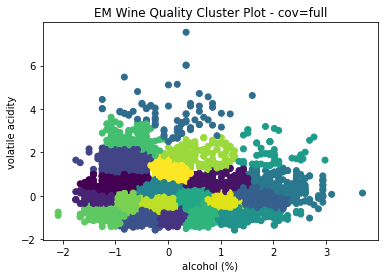

In [34]:
# EM with only two parameters (alchohol, volatile acidity)
x1= df.drop(['quality', 'type', 'fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates'], axis=1)

# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(x1)
scaled_x = scaler.transform(x1)
xs = pd.DataFrame(scaled_x, columns = x1.columns)

gmm = GaussianMixture(n_components=21, max_iter=5000, covariance_type='full', random_state=1)
tic = time.perf_counter()
gmm_y = gmm.fit_predict(xs)
toc = time.perf_counter()
predquality = np.zeros_like(gmm_y)


for i in range(21):
    cat = (gmm_y == i)
    predquality[cat] = statistics.mean(y[cat]) 
    print(i, statistics.mean(y[cat]), cat.sum()) 
acc = accuracy_score(y, predquality)
print("Accuracy using GMM = ", acc)
print('MAE: ', mean_absolute_error(y, predquality))
print('time: ', (toc-tic))

pyplot.scatter(xs['alcohol'], xs['volatile acidity'], c=gmm_y, label=gmm_y)
pyplot.title('EM Wine Quality Cluster Plot - cov=full')
pyplot.ylabel('volatile acidity')
pyplot.xlabel('alcohol (%)')